In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import sklearn.linear_model as linear_model
%matplotlib inline

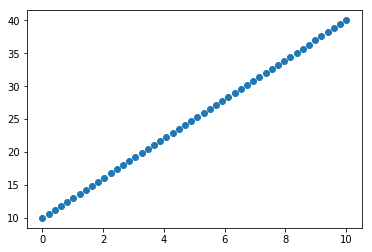

In [13]:
# 数据量。
SIZE = 50
# 产生数据。np.linspace 返回一个一维数组，SIZE指定数组长度。
# 数组最小值是0，最大值是10。所有元素间隔相等。
X = np.linspace(0, 10, SIZE)
Y = 3 * X + 10
plt.figure()
plt.scatter(X,Y)
plt.show()

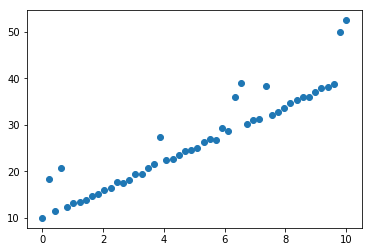

In [14]:
# 让散点图的数据更加随机并且添加一些噪声。
random_x = []
random_y = []
# 添加直线随机噪声
for i in range(SIZE):
    random_x.append(X[i])
    random_y.append(Y[i] + random.uniform(-0.5, 0.5)) 

for i in range(10):
    index = random.randint(0,49)
#     if index >= 40:
    random_y[index] += random.randint(0,10)
random_y[49] += random.randint(5,10)
RANDOM_X = np.array(random_x) # 散点图的横轴。
RANDOM_Y = np.array(random_y) # 散点图的纵轴。
plt.figure()
plt.scatter(RANDOM_X, RANDOM_Y)
# plt.show()

[ 3.16616953 10.52626725] (2,)
 
3.166 x + 10.53


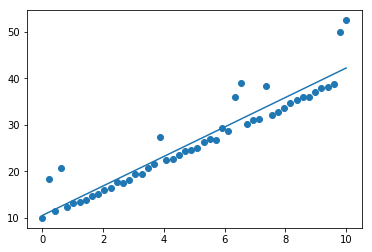

iter: 10
0.002002716064453125


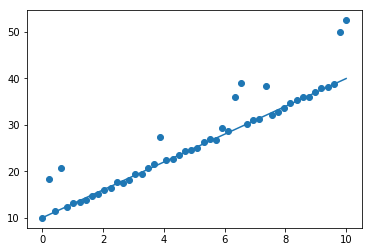

In [15]:
npfunc = np.polyfit(RANDOM_X, RANDOM_Y, 1)
print(npfunc, npfunc.shape)
print(np.poly1d(npfunc))
npfunc = np.poly1d(npfunc)
y = npfunc(RANDOM_X)
plt.figure()
plt.scatter(RANDOM_X, RANDOM_Y)
plt.plot(RANDOM_X,y)
plt.show()

bestfunc = npfunc
iters = 50
# 数据和模型之间可接受的差值
sigma = 0.5
# 最好模型的参数估计和内点数目
best_a = 0
best_b = 0
pretotal = 0
P = 0.99
import time
init_time = time.time()
loop_count = 0
while loop_count < iters:
    # 随机在数据中红选出两个点去求解模型
    sample_index = random.sample(range(SIZE),SIZE//5)
    
    sample_X, sample_Y = RANDOM_X[sample_index], RANDOM_Y[sample_index]
    npfunc = np.poly1d(np.polyfit(sample_X, sample_Y, 1))
    
    Y_error = abs(npfunc(RANDOM_X) - RANDOM_Y)
    total_inlier = np.sum(Y_error < sigma) 

    # 判断当前的模型是否比之前估算的模型好
    loop_count+=1
    if total_inlier > pretotal:
        iters = math.log(1 - P) / math.log(1 - pow(total_inlier / SIZE, 2))
        pretotal = total_inlier
        bestfunc = npfunc

    # 判断是否当前模型已经符合超过一半的点
    if total_inlier > SIZE*2//3:
        print("iter:", i+1)
        break
print(time.time()-init_time)
plt.figure()
plt.scatter(RANDOM_X, RANDOM_Y)
plt.plot(RANDOM_X,bestfunc(RANDOM_X))
plt.show()

In [16]:
SIZE*2//3

33

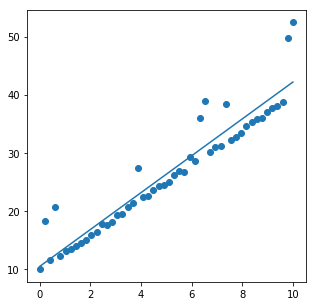

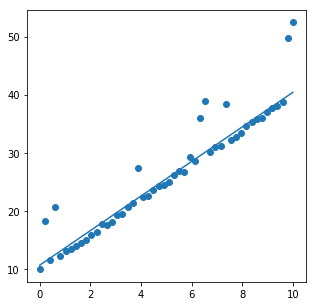

In [26]:
model = linear_model.LinearRegression()
model.fit(RANDOM_X.reshape(-1,1), RANDOM_Y.reshape(-1,1))

plt.figure(figsize=(5,5))
plt.scatter(RANDOM_X, RANDOM_Y)
plt.plot(RANDOM_X, model.predict(RANDOM_X.reshape(-1,1)))

model_ransac = linear_model.RANSACRegressor(model)
model_ransac.fit(RANDOM_X.reshape(-1,1), RANDOM_Y.reshape(-1,1))

plt.figure(figsize=(5,5))
plt.scatter(RANDOM_X, RANDOM_Y)
plt.plot(RANDOM_X, model_ransac.predict(RANDOM_X.reshape(-1,1)))

1